# @author: giuseppec

###### credits to Selva Prabhakaran

In [65]:

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# NLTK Stop words
import nltk
from nltk import FreqDist
#nltk.download('stopwords')
#!python -m spacy download en

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herse"', 'him', 'himse"', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itse"', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myse"', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])



#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'inline')


warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Import Dataset


In [67]:
#df = pd.read_csv('CodingOverview_GREY_no_DATA.csv', sep=',', encoding='latin-1', engine='python')
#df = pd.read_csv('CodingOverview_no_Data.csv', sep=',', encoding='latin-1', engine='python')
df = pd.read_csv('protect_dataset_nodata.csv', sep=',', encoding='latin-1', engine='python')

print(df.shape)
df.head()

(970, 2)


,Code,Text
0,PRED,while security forces are more likely to be pr...
1,PRED,focused on planning and prediction practices i...
2,IDEN,identifying potential targets
3,PRED,preparing a recovery plan
4,PRED,developing statistical forecasting systems and...


### Import dataset for Topological Analysis as a List of List [['a'],['b'],['c'],...]

In [68]:
top_analysis = [] 

#df2 = pd.read_csv('CodingOverview_GREY_no_DATA.csv', sep=',', encoding='latin-1', engine='python')
#df2 = pd.read_csv('CodingOverview_no_Data.csv', sep=',', encoding='latin-1', engine='python')
df2 = pd.read_csv('protect_dataset_nodata.csv', sep=',', encoding='latin-1', engine='python')

temp_list = list(df.Text)

for el in temp_list: 
        sub = el.split(', ') 
        top_analysis.append(sub) 


print(top_analysis[:5])

[['while security forces are more likely to be prediction and physical-measures oriented. '], ['focused on planning and prediction practices in preparation for future terrorist attacks. '], ['identifying potential targets '], ['preparing a recovery plan '], ['developing statistical forecasting systems and destination-specific antiterrorism action plans. ']]


## Removing the emails, new line characters, single quotes. Setting the deacc=True option removes punctuations.

In [69]:
def sent_to_words(sentences):
    for sent in sentences:
        #sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        #sent = re.sub('\s+', ' ', sent)  # remove newline chars
        #sent = re.sub("\'", "", sent)  # remove single quotes
        #sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

## Convert to list  ---> TEXT is the column i want to convert

In [70]:
# Convert to list  ---> TEXT is the column i want to convert
data = df.Text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:5])

['while security forces are more likely to be prediction and physical-measures oriented. ', 'focused on planning and prediction practices in preparation for future terrorist attacks. ', 'identifying potential targets ', 'preparing a recovery plan ', 'developing statistical forecasting systems and destination-specific antiterrorism action plans. ']


# Build the Bigram, Trigram Models and Lemmatize    
### Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.
### Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.
### We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.


In [71]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#!python3 -m spacy download en  # run in terminal once
#def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): ### Too hard as a lemmetisations
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ']): ### softer as lemmatisation

    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!  

# Build the Topic Model
## To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. 

In [72]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True
                                           )

pprint(lda_model.print_topics())

[(0,
  '0.017*"terrorist" + 0.016*"model" + 0.015*"activity" + 0.015*"people" + '
  '0.015*"attack" + 0.015*"event" + 0.015*"different" + 0.013*"behavior" + '
  '0.012*"detection" + 0.012*"approach"'),
 (1,
  '0.026*"security" + 0.012*"information" + 0.011*"public" + '
  '0.010*"technology" + 0.010*"sensor" + 0.009*"city" + 0.009*"police" + '
  '0.008*"time" + 0.008*"safety" + 0.007*"smart"'),
 (2,
  '0.014*"detection" + 0.013*"algorithm" + 0.013*"motion" + 0.012*"frame" + '
  '0.012*"vehicle" + 0.011*"image" + 0.011*"bollard" + 0.010*"object" + '
  '0.010*"human" + 0.009*"task"'),
 (3,
  '0.027*"crime" + 0.014*"area" + 0.012*"information" + 0.012*"analysis" + '
  '0.012*"model" + 0.011*"pattern" + 0.011*"video" + 0.010*"human" + '
  '0.010*"rule" + 0.010*"algorithm"')]


#    Compute c_v coherence for various number of topics
##    Parameters:
###    ----------
###    dictionary : Gensim dictionary
###    corpus : Gensim corpus
###    texts : List of input texts
###    limit : Max num of topics
##    Returns:
###    -------
###    model_list : List of LDA topic models
###    coherence_values : Coherence values corresponding to the LDA model with respective number of topics

In [ ]:
dictionary = id2word

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data_ready, start=1, limit=12, step=2)

# Show graph
limit=12; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAVis ---- TOPIC MODELLING

## pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. 
## Below is the implementation for LdaModel().

In [63]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.save_html(vis, 'visualization/topic_modeling/topic_modellingV2.html')


C:\Users\20185123\AppData\Local\Continuum\anaconda3\envs\analisys_environment\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# What is the Dominant topic and its percentage contribution in each document
### In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.
### This way, you will know which document belongs predominantly to which topic.

In [73]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)  #<------- Dominant topic DATA FRAME

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5804,"security, information, public, technology, sen...","[security, force, likely, prediction, physical..."
1,1,0.0,0.4428,"terrorist, model, activity, people, attack, ev...","[focused, planning, prediction, practice, prep..."
2,2,0.0,0.7438,"terrorist, model, activity, people, attack, ev...","[potential, target]"
3,3,0.0,0.7462,"terrorist, model, activity, people, attack, ev...","[recovery, plan]"
4,4,1.0,0.6273,"security, information, public, technology, sen...","[statistical, forecasting, destination, specif..."
5,5,1.0,0.6539,"security, information, public, technology, sen...","[police, chief, great, importance, prediction]"
6,6,0.0,0.7191,"terrorist, model, activity, people, attack, ev...","[prediction, feasible, terrorist, attack, tour..."
7,7,3.0,0.4992,"crime, area, information, analysis, model, pat...","[prediction, feasible, category, terrorism, pr..."
8,8,1.0,0.6333,"security, information, public, technology, sen...","[potential, issue, real, time, effective, emer..."
9,9,3.0,0.9490,"crime, area, information, analysis, model, pat...","[datum, mining, diverse, real, time, social, s..."


# The most representative sentence for each topic
### Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [74]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10) #<------- Most Representative sentence in each topic DATA FRAME

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9753,"terrorist, model, activity, people, attack, event, different, behavior, detection, approach","[early, attempt, meaningful, pattern, suicide, attack, network, model, new, evolution, stimulati..."
1,1.0,0.9815,"security, information, public, technology, sensor, city, police, time, safety, smart","[complex, iot, security, domain, iot, cybersecurity, challenge, significant, research, attention..."
2,2.0,0.9821,"detection, algorithm, motion, frame, vehicle, image, bollard, object, human, task","[way, tracker, test, sequence, initialization, ground, truth, position, frame, tracking, method,..."
3,3.0,0.9837,"crime, area, information, analysis, model, pattern, video, human, rule, algorithm","[berk, predictive, engine, thousand, individual, criminal, record, dozen, variable, age, gender,..."


# Frequency Distribution of Word Counts in Documents
### When working with a large number of documents, you want to know how big the documents are as a whole
### and by topic. Let’s plot the document word counts distribution.

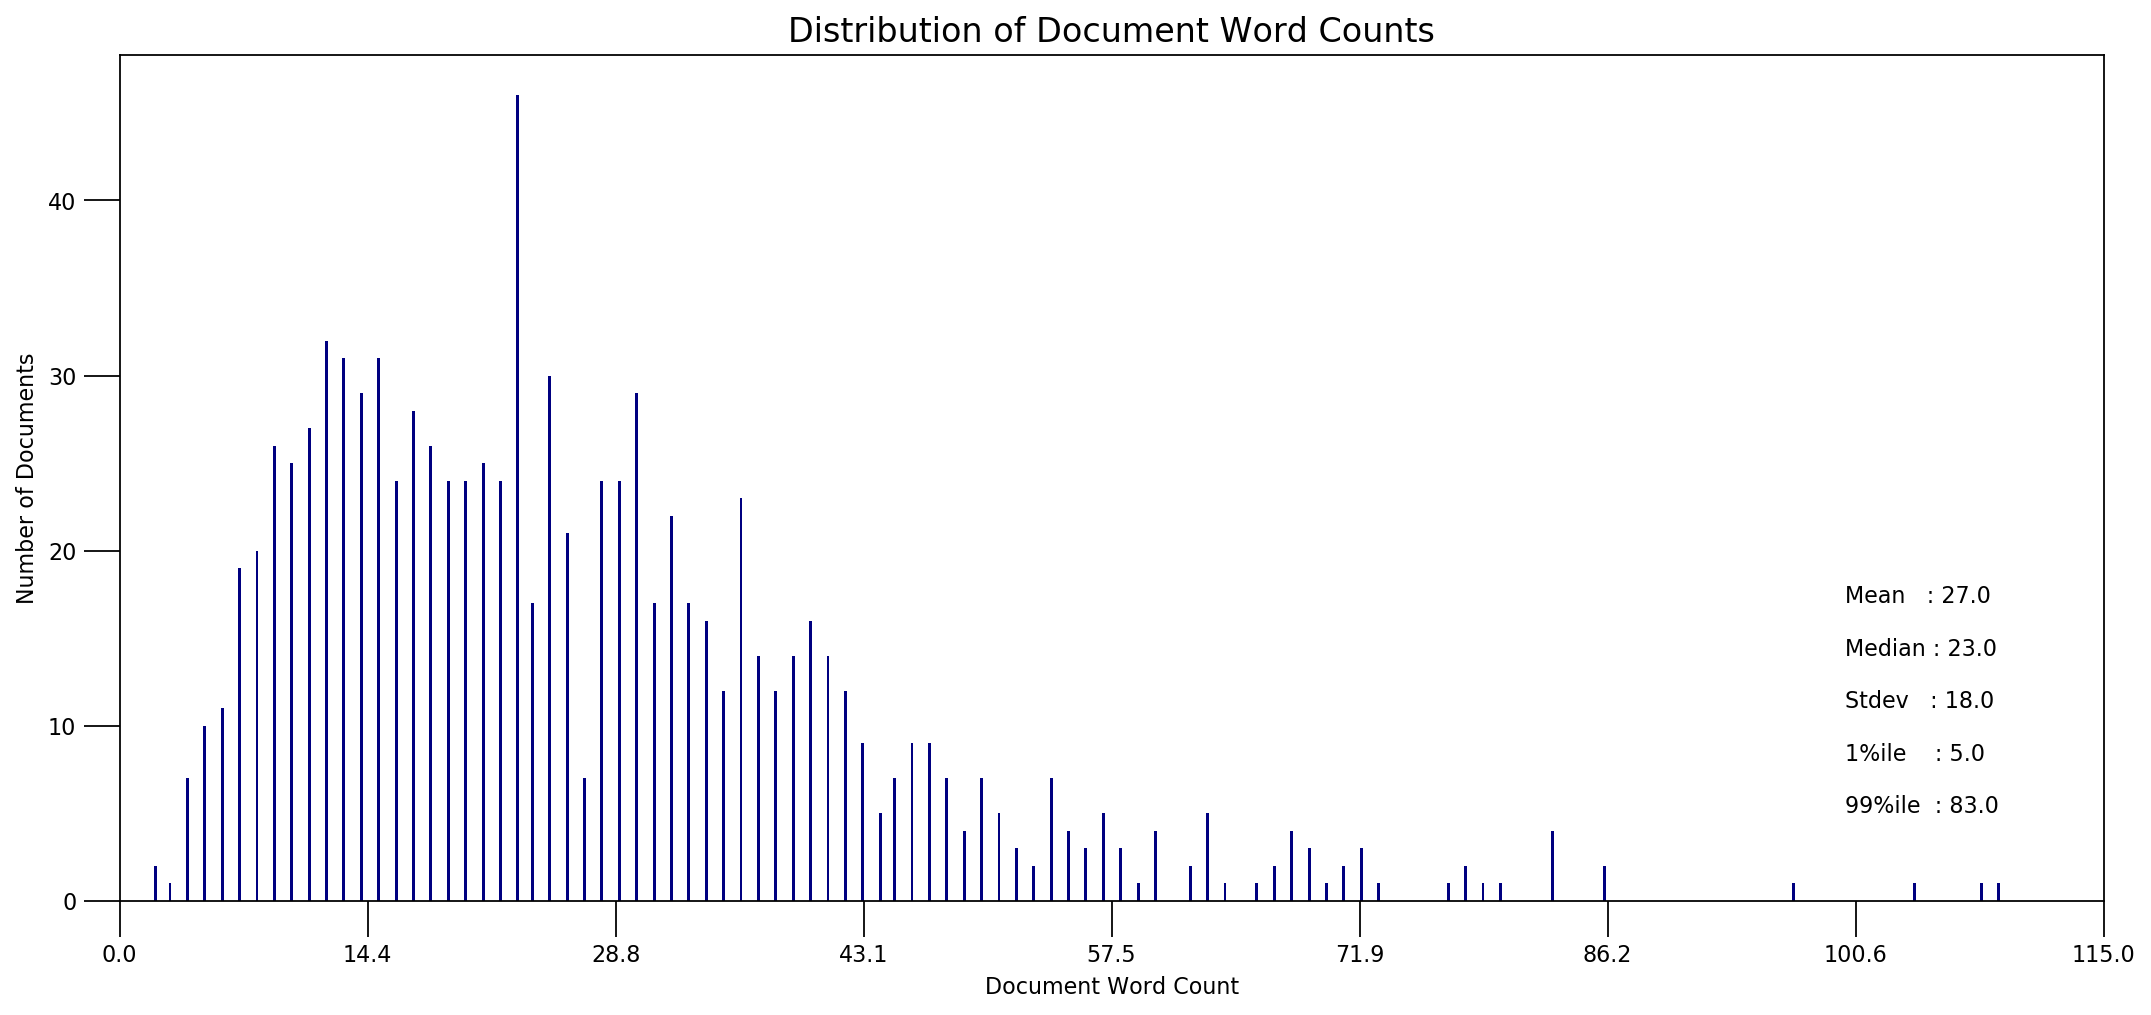

In [80]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(100, 17.0, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(100,  14.0, "Median : " + str(round(np.median(doc_lens))))
plt.text(100,  11.0, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(100,  8.0, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(100,  5.0, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,115,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=15))
plt.show()
#plt.savefig("C:/Users/20185123/Desktop/distribution_document_word_count.png") # save as png

# Distribution of Word Counts in Documents

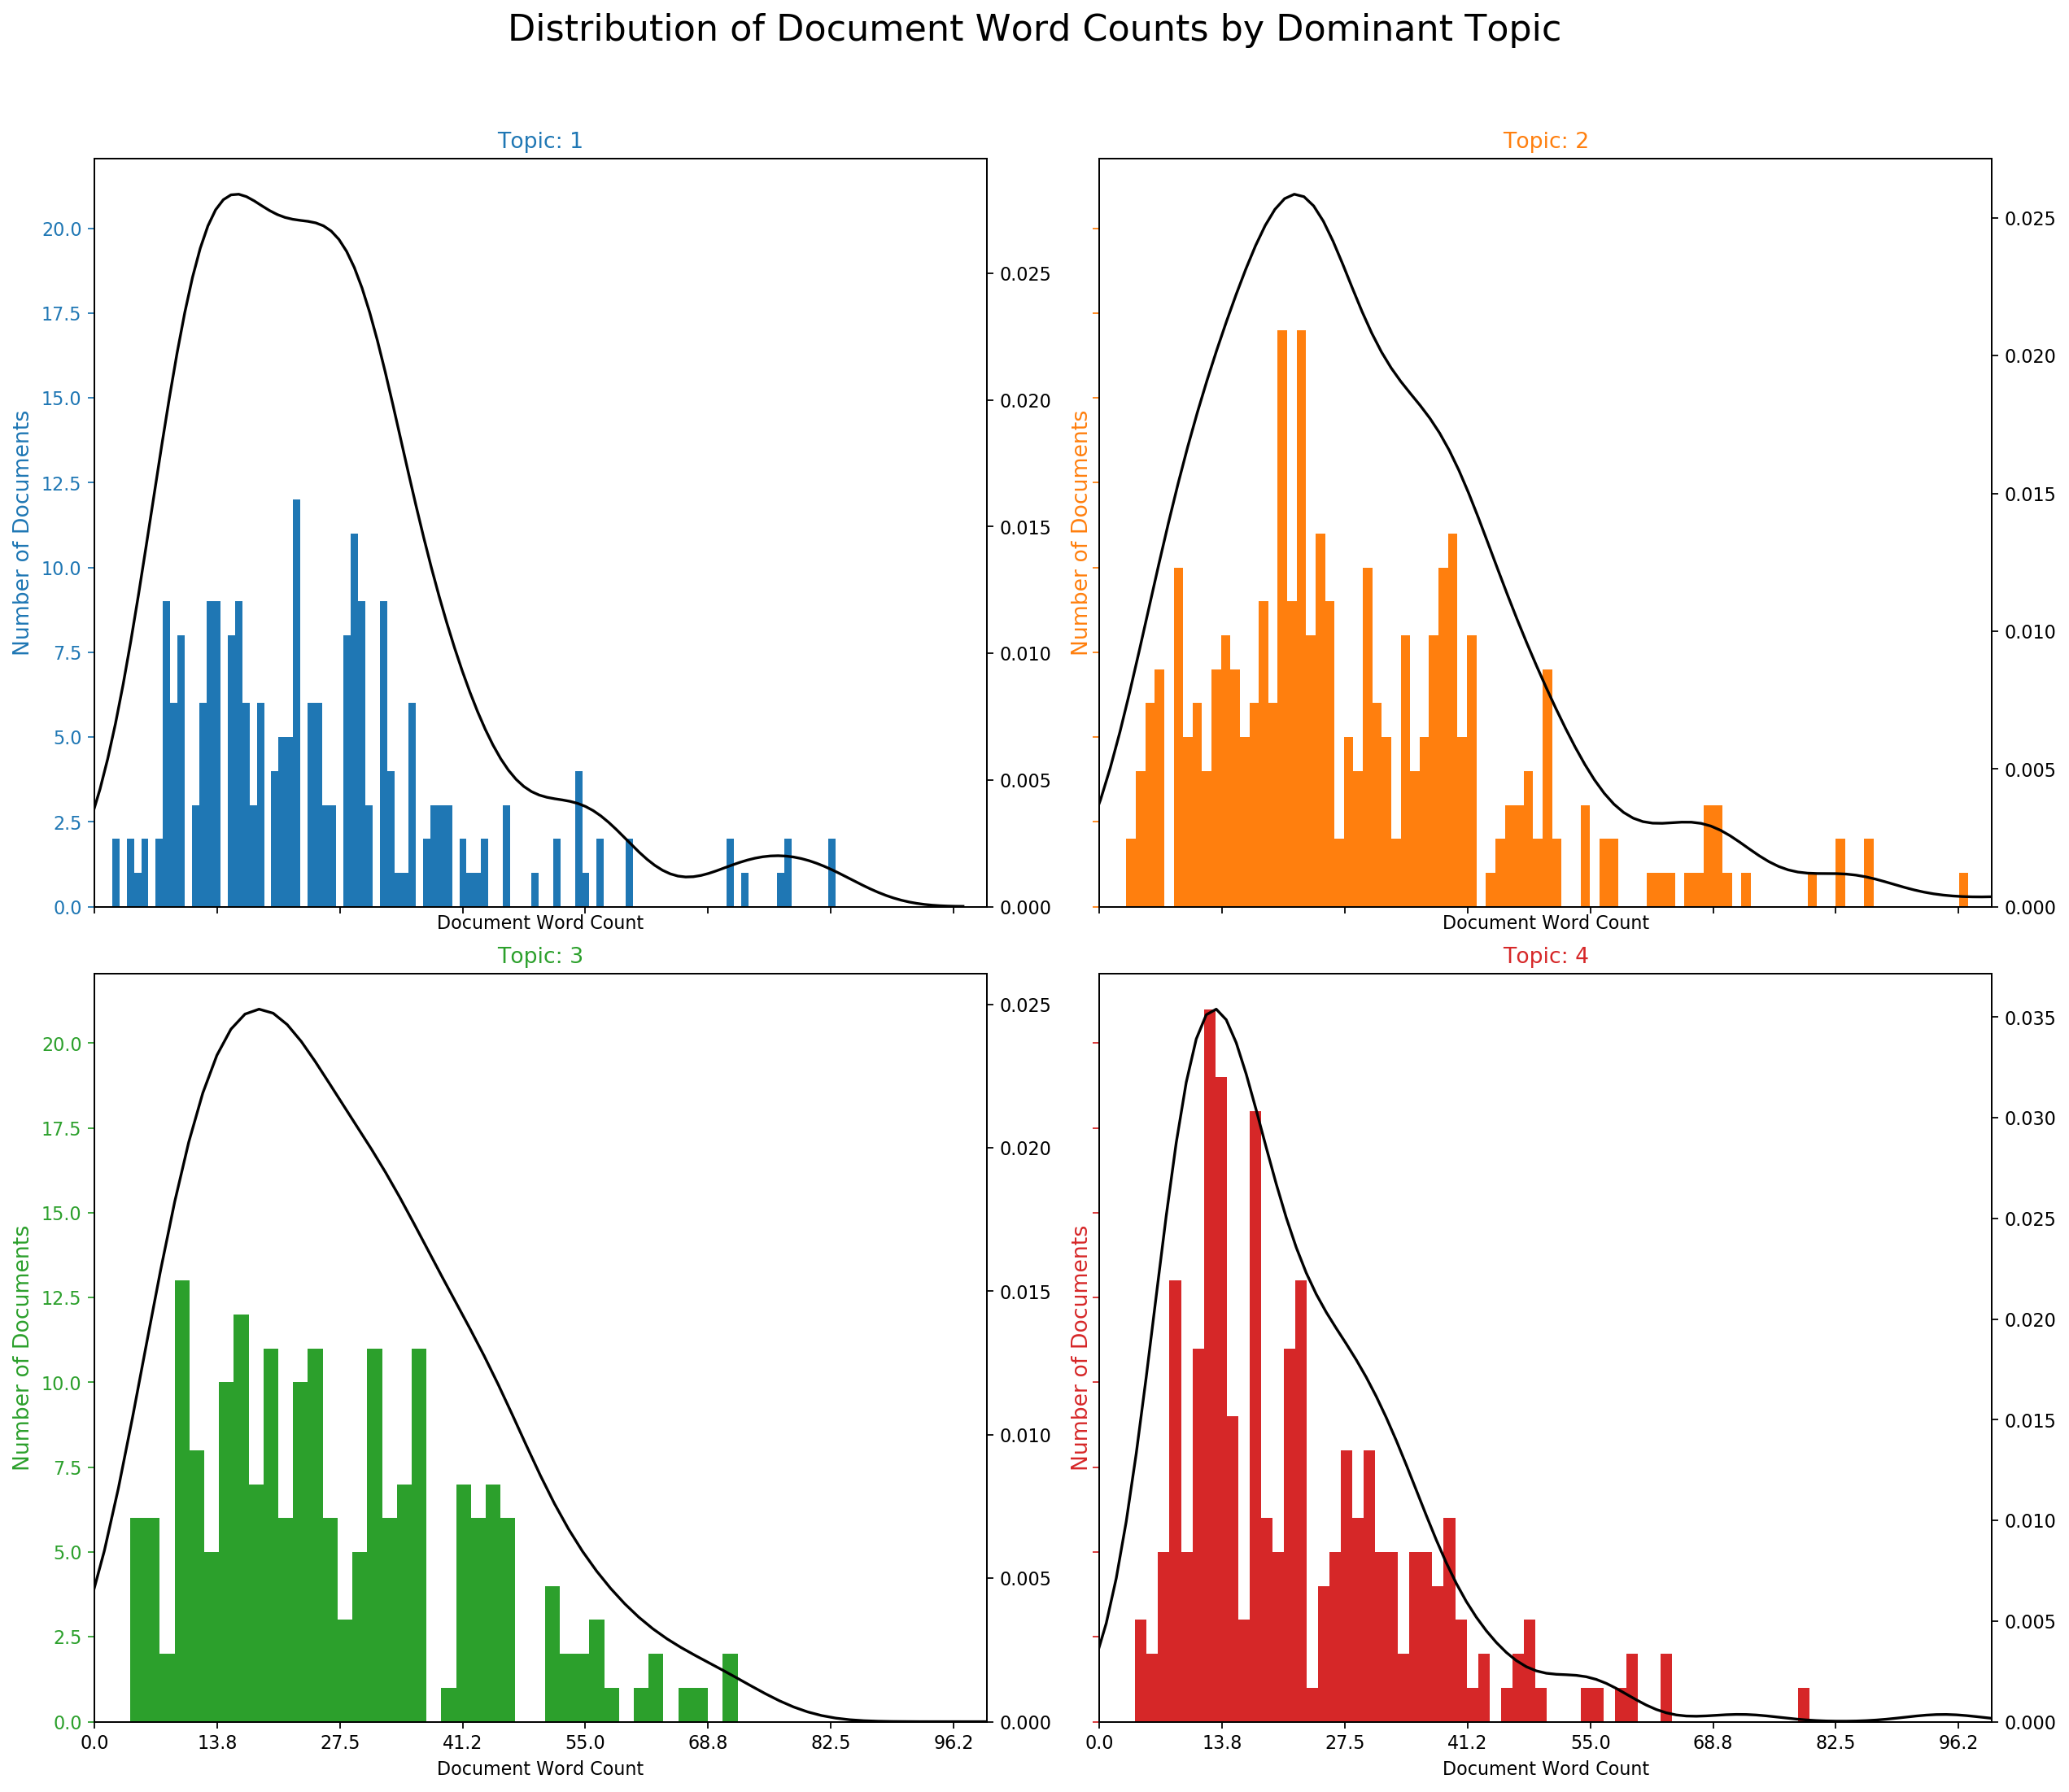

In [103]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i], size=12)
    ax.set_title('Topic: '+str(i+1), fontdict=dict(size=12, color=cols[i]))### str(i+1) renames the topics starting from 1 instead of 0

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,110,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=20)
plt.show()
#plt.savefig("C:/Users/20185123/Desktop/distribution_word_count_in_doc.png") # save as png

# Word Clouds of Top N Keywords in Each Topic
### a word cloud with the size of the words proportional to the weight is a pleasant sight. 

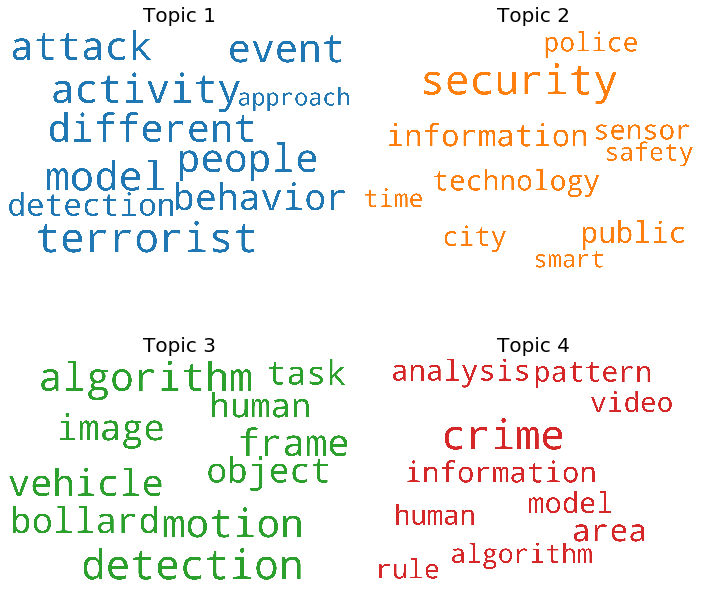

In [110]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=20))### str(i+1) renames the topics starting from 1 instead of 0
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
#plt.savefig("C:/Users/20185123/Desktop/word_cloud_per_topic.png") # save as png

# Word Counts of Topic Keywords
### how frequently the words have appeared in the documents

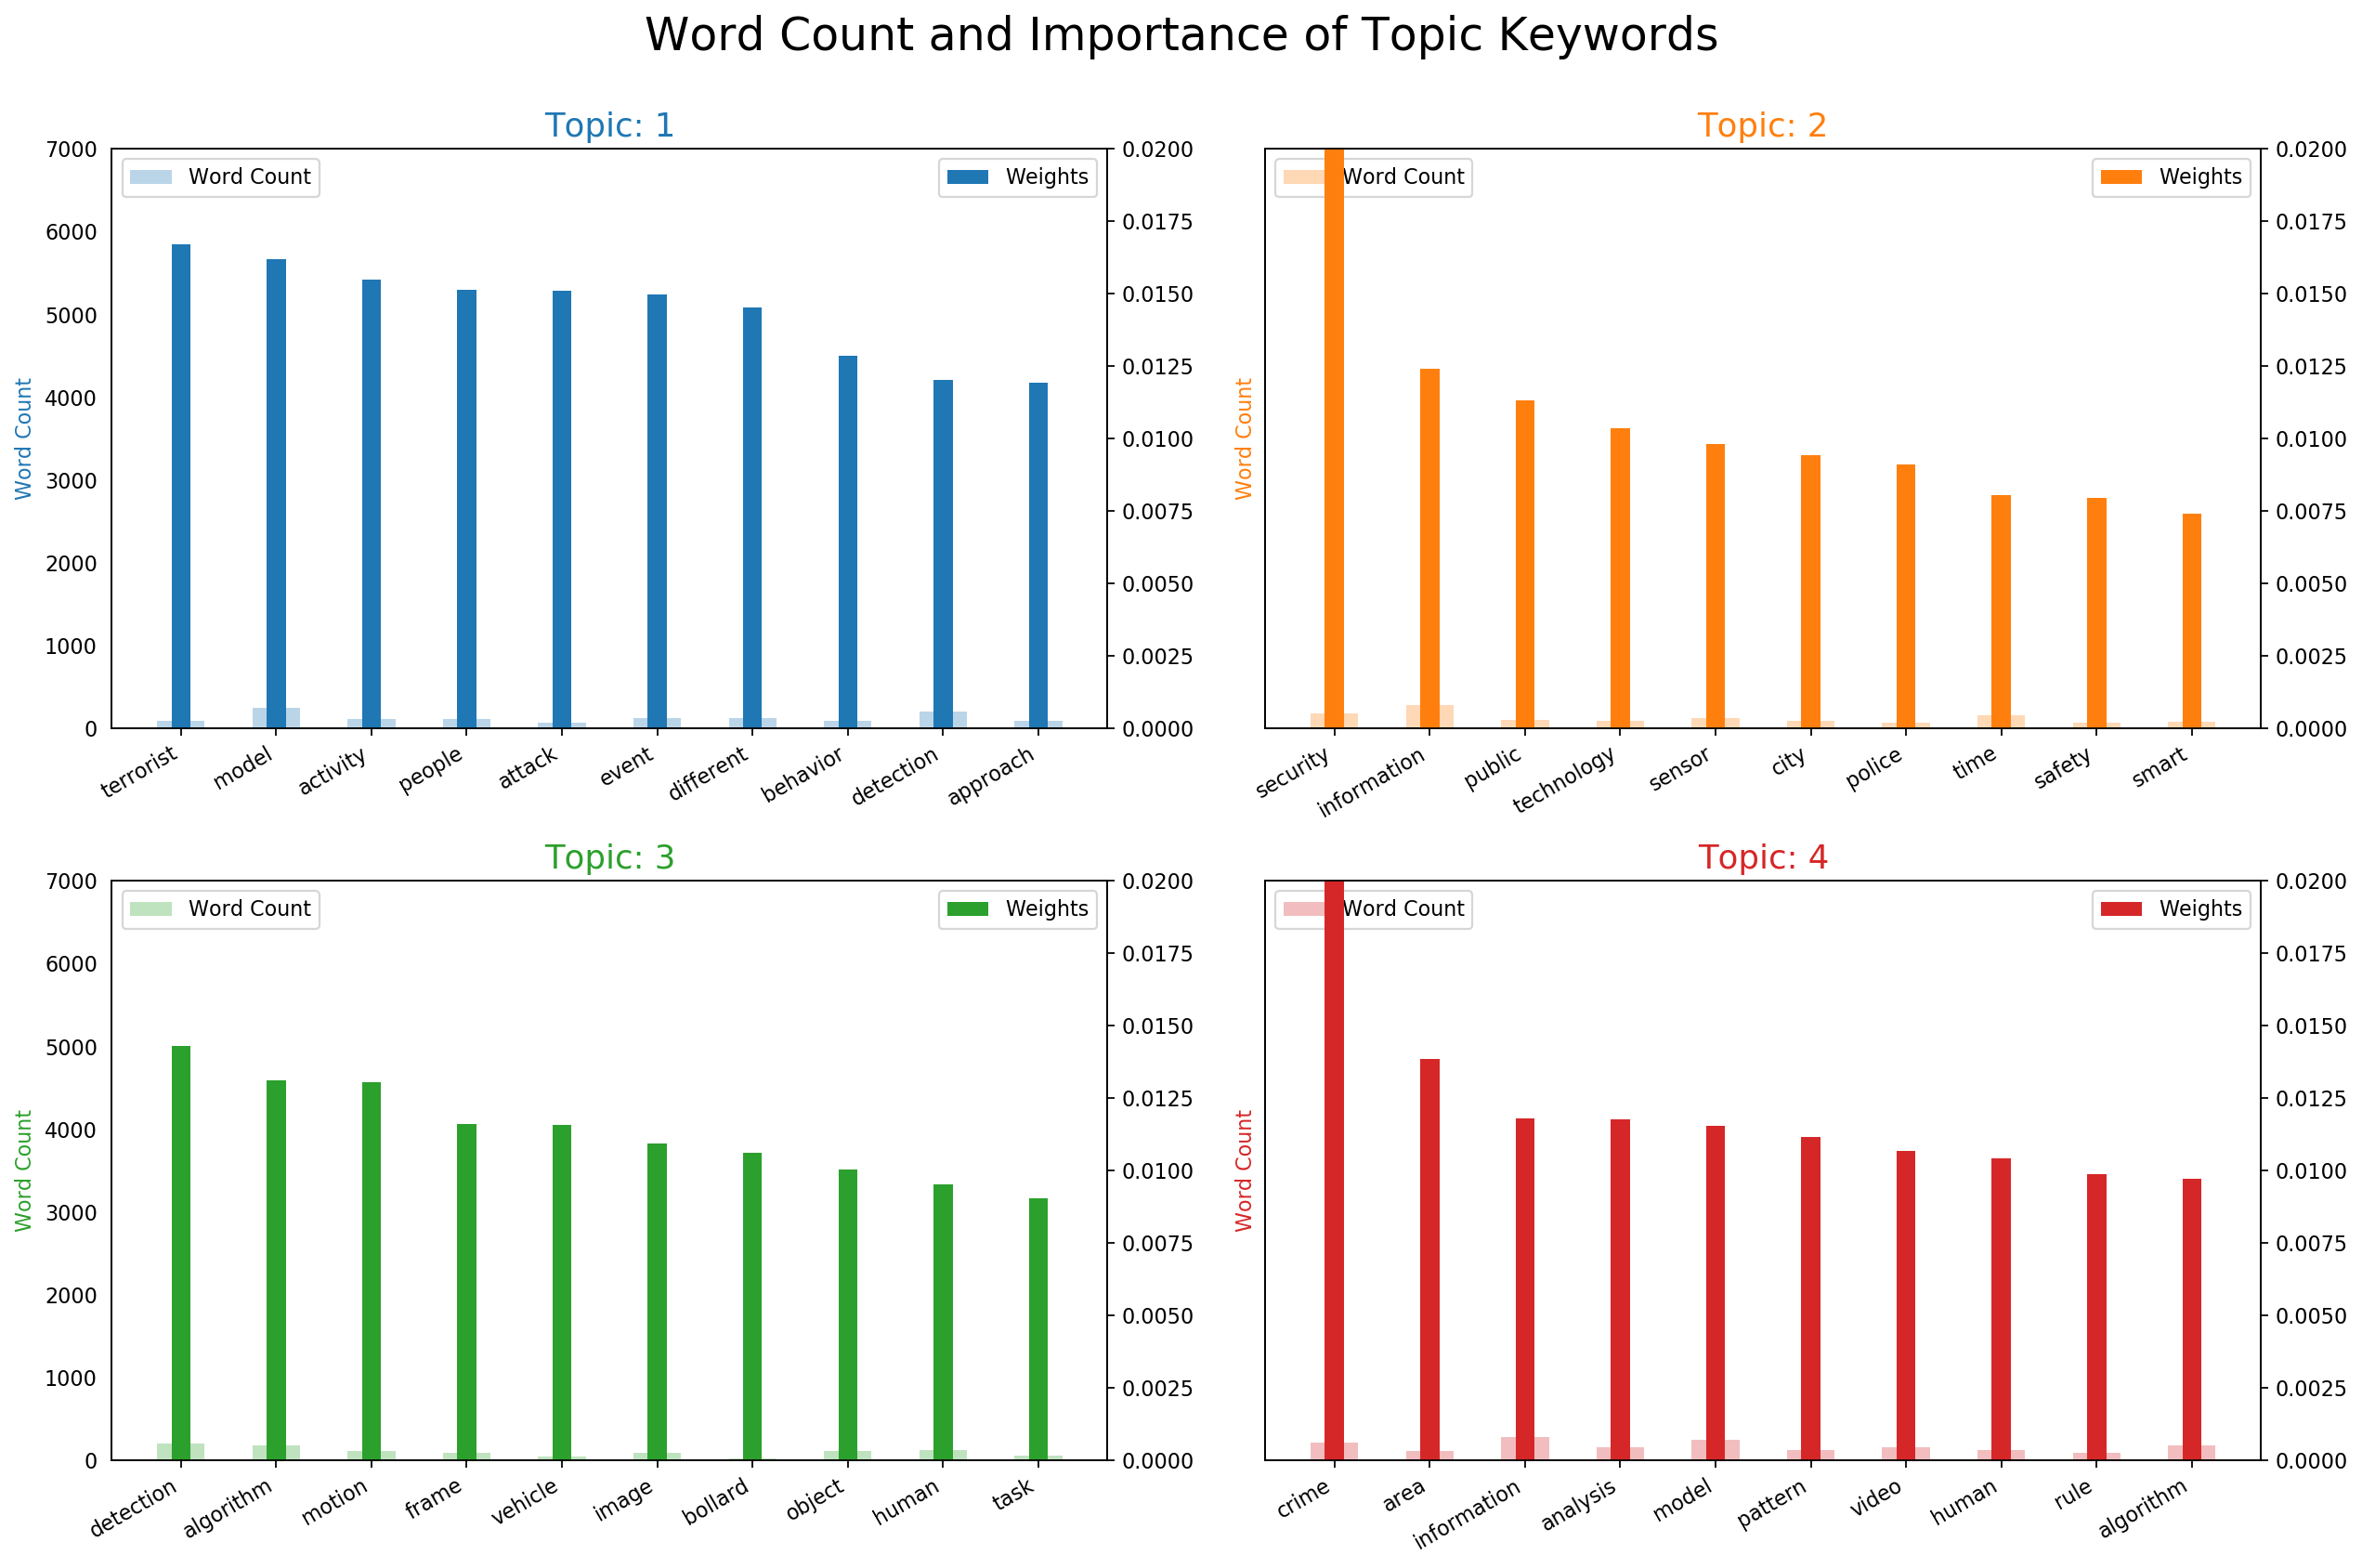

In [113]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.020); ax.set_ylim(0, 7000)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)### str(i+1) renames the topics starting from 1 instead of 0
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
#plt.show()
plt.savefig("C:/Users/20185123/Desktop/word_count_importance_of_topic_keywords.png") # save as png

# Sentence Chart Colored by Topic
### Each word in the document is representative of one of the 4 topics. 
### Let’s color each word in the given documents by the topic id it is attributed to.
### The color of the enclosing rectangle is the topic assigned to the document.

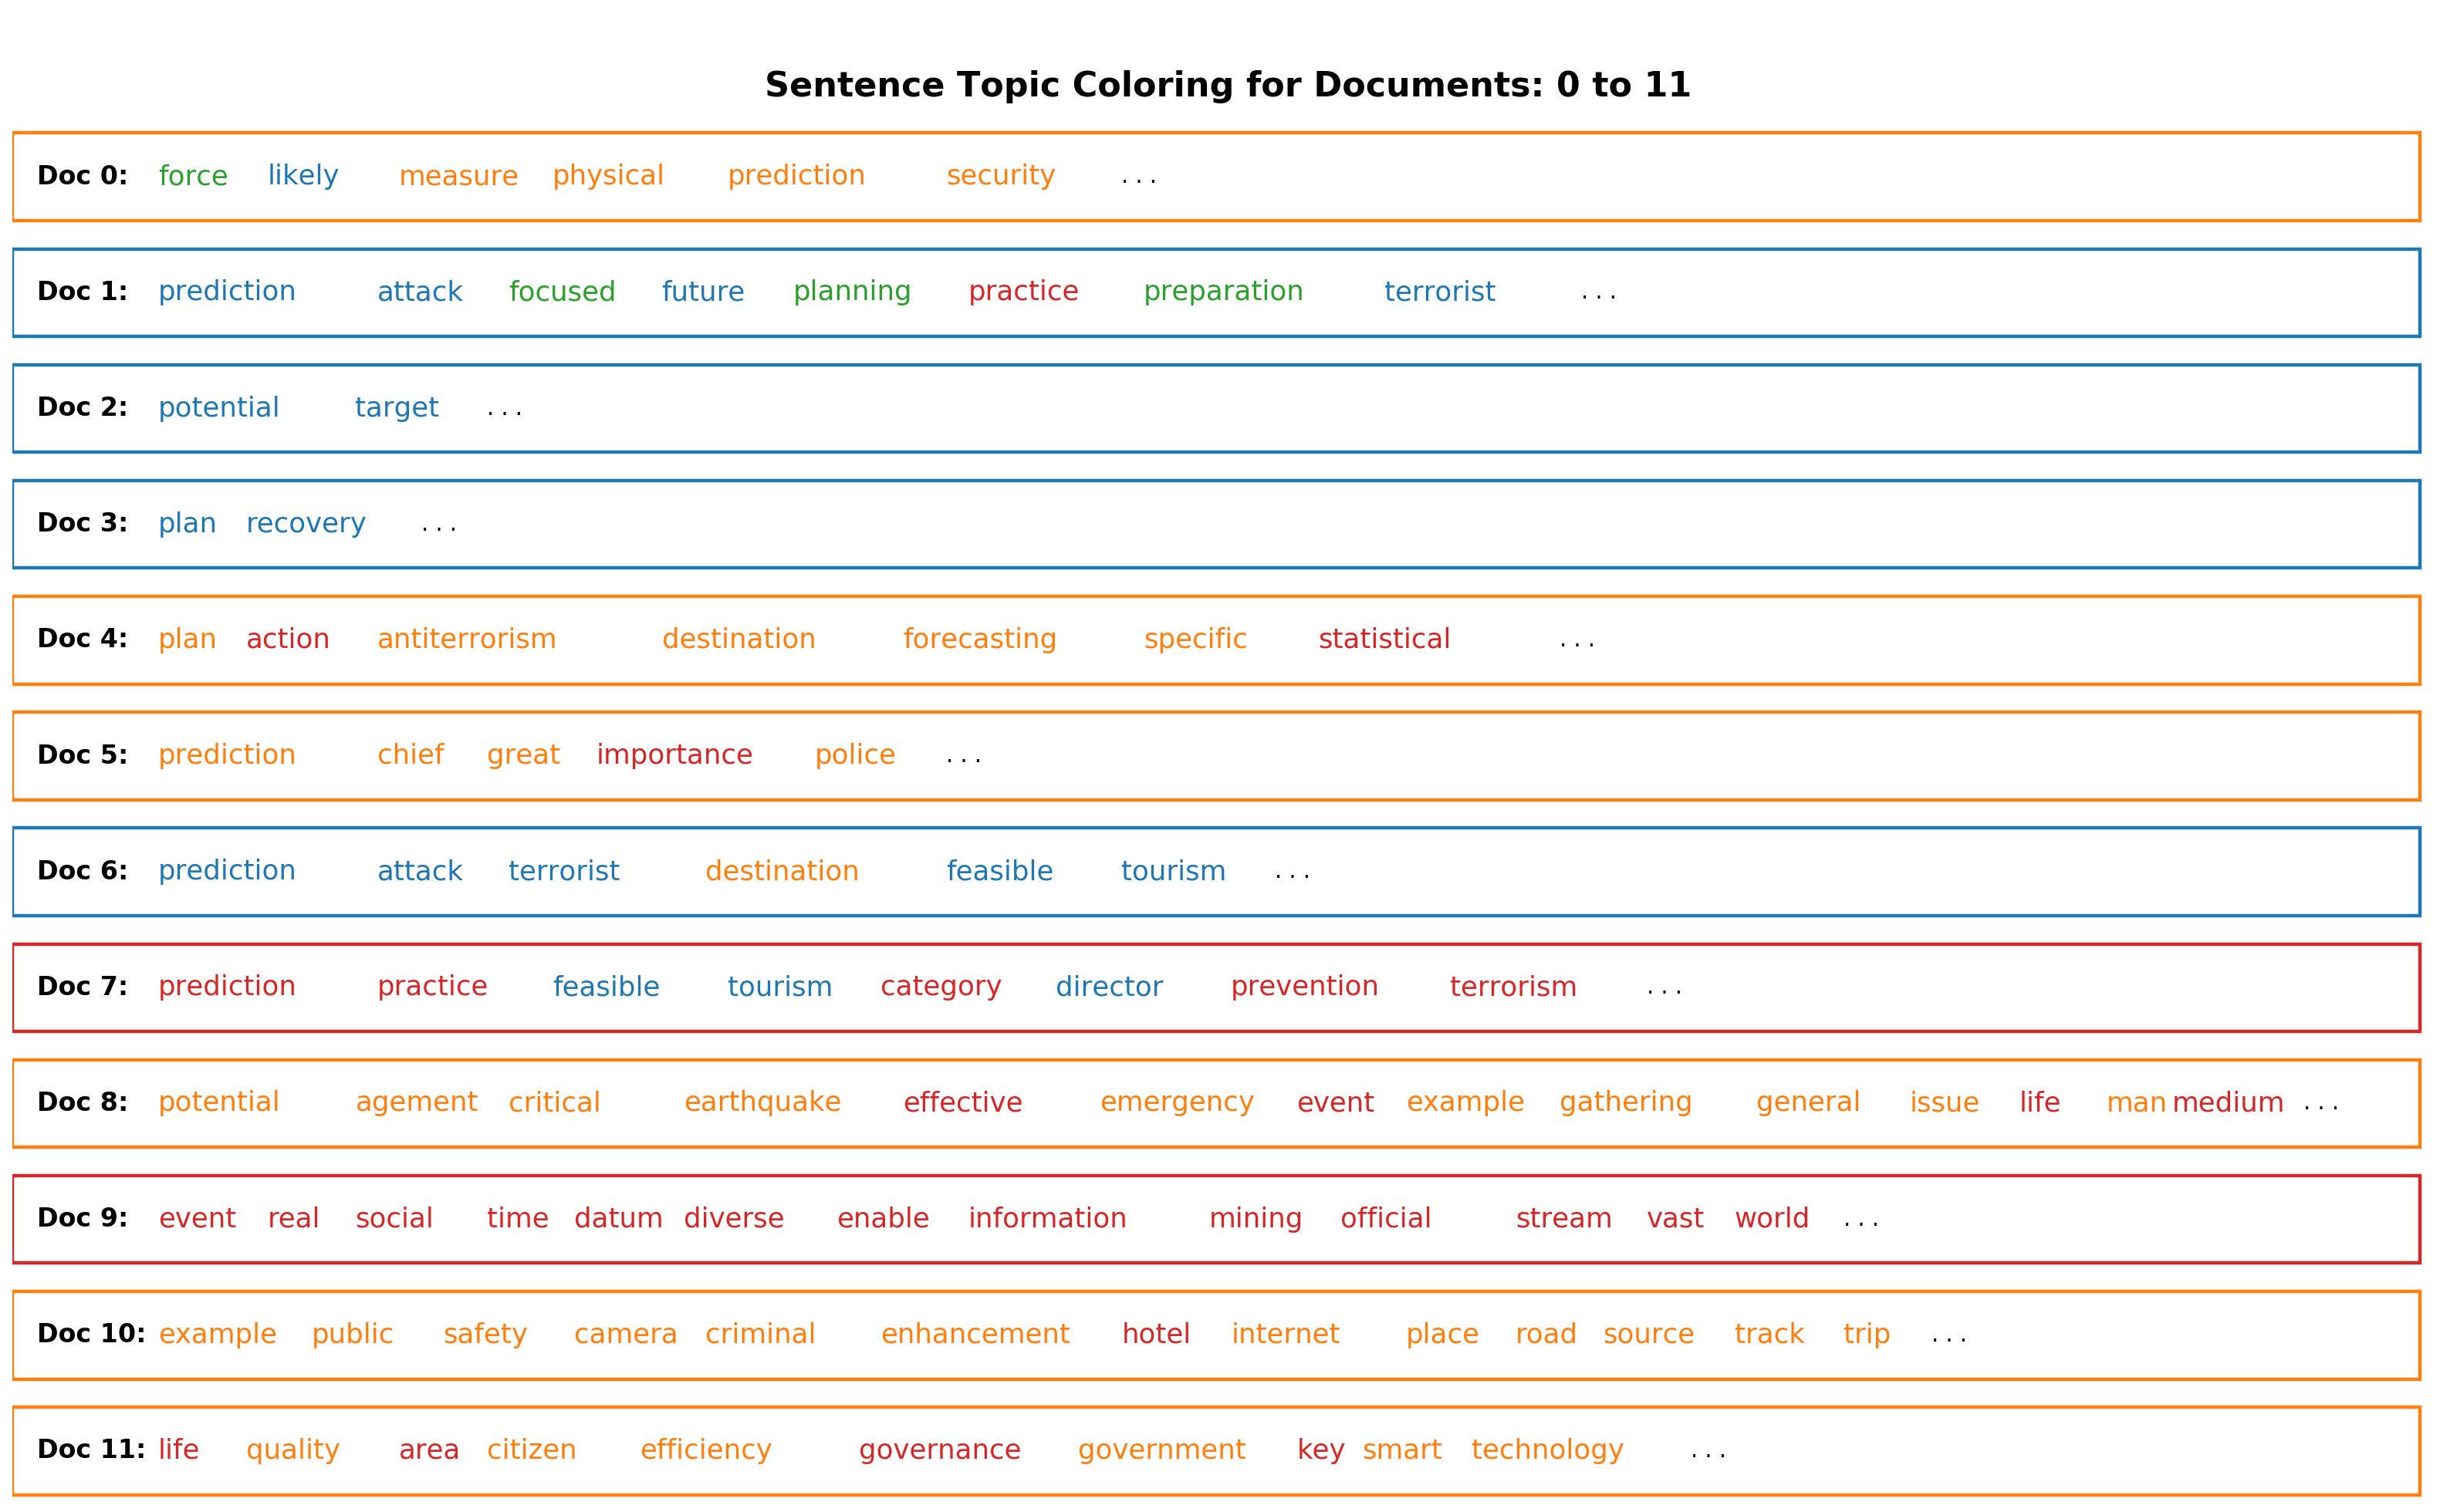

In [132]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=15, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=400)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=13, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=20, y=0.95, fontweight=700)
    plt.tight_layout()
    #plt.show()
    plt.savefig("C:/Users/20185123/Desktop/sentence_topic_coloring.png") # save as png
    
sentences_chart()  

# What are the most discussed topics in the documents?
### Let’s compute the total number of documents attributed to each topic.

In [147]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4] ### chose the number of words under the topic

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

# Let’s make two plots:

### 1. The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
### 2. The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

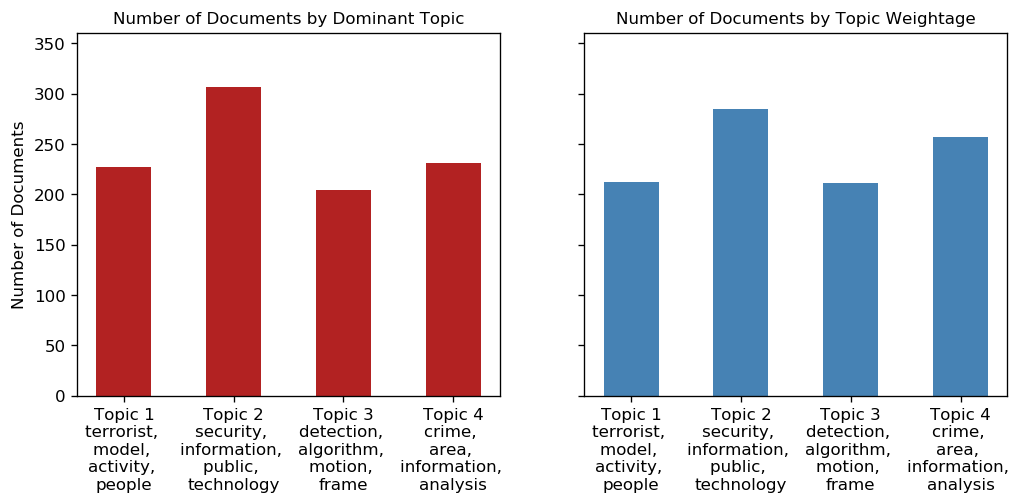

In [150]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0]) ### str(x+1) in order to start counting from 1 instead of 0
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 360)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()
#plt.savefig("C:/Users/20185123/Desktop/N_doc_topic_and_weight.png") # save as png


# t-SNE Clustering Chart
### Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [155]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook, export_png

from bokeh.embed import components, file_html
from bokeh.resources import CDN


from matplotlib import pyplot as plt


# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.002s...
[t-SNE] Computed neighbors for 961 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.064943
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.442780
[t-SNE] KL divergence after 1000 iterations: 0.427596


Loading BokehJS ...

# Topological Analysis
### Using kmapper to create a 2D topology based on the word2vec extraction

In [43]:
from gensim.models import Word2Vec
import gensim, logging

# df ##whole dataset
# data_words ##dataset in a list
# data_ready ##dataset lemmatized

model = Word2Vec(data_ready)
X = model[model.wv.vocab]
words = list(model.wv.vocab)

# Import the class
import kmapper as km
from sklearn import cluster

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.2)

# Visualize it
mapper.visualize(graph, path_html="visualization/word2vec_analysis/word2vec_top_analysis.html", X =X, X_names = words,
                 title="Topological analysis word2vec");



KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1076, 100)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (1076, 100) using lens shaped (1076, 2)

Creating 100 hypercubes.

Created 202 edges and 75 nodes in 0:00:00.116337.
Wrote visualization to: visualization/word2vec_analysis/word2vec_top_analysis.html


In [17]:
# Import Dataset for Topological analisys - list of list dataset

# import csv

# #df = pd.read_csv('protect_dataset_nodata.csv', sep=',', encoding='latin-1', engine='python')

# with open('CodingOverview_topol_analysis.csv', newline='') as f:
#     reader = csv.reader(f)
#     topological_analysis = list(reader)
    
# print(topological_analysis[:4])    



## Mapper with LSA 
### https://kepler-mapper.scikit-tda.org/notebooks/KeplerMapper-Newsgroup20-Pipeline.html

In [49]:
# from kmapper import jupyter
import kmapper as km
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# df ##whole dataset
# data_words ##dataset in a list
# data_ready ##dataset lemmatized

X = np.array([string for elem in top_analysis for string in elem])

##### max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
##### max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
##### max_df = 25 means "ignore terms that appear in more than 25 documents".
##### The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.
###################################################################################
##### min_df is used for removing terms that appear too infrequently. For example:
##### min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
##### min_df = 5 means "ignore terms that appear in less than 5 documents".
##### The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [50]:
mapper = km.KeplerMapper(verbose=2)

projected_X = mapper.fit_transform(X,
    projection=[TfidfVectorizer(analyzer="char",
                                ngram_range=(1,6),
                                max_df=0.97,
                                min_df=0.02),
                TruncatedSVD(n_components=100,
                             random_state=1729),
                Isomap(n_components=2,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()]);

KeplerMapper()
..Composing projection pipeline of length 3:
	Projections: TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.97, max_features=None,
                min_df=0.02, ngram_range=(1, 6), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
		TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=1729, tol=0.0)
		Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=-1, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)
	Distance matrices: False
False
False
	Scalers: None
None
MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting o

In [51]:
graph = mapper.map(projected_X,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=2,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.33);

Mapping on data shaped (970, 2) using lens shaped (970, 2)

Minimal points in hypercube before clustering: 2
Creating 100 hypercubes.
Cube_0 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_9 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_15 is empty.

Cube_16 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.



In [52]:
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,3),
                      max_df=0.98,
                      min_df=0.02)

interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names()

In [53]:
html = mapper.visualize(graph, 
                        path_html="visualization/topological_data_analysis/TDA.html",
                        X=interpretable_inverse_X,
                        X_names=interpretable_inverse_X_names,
                        title="")

Wrote visualization to: visualization/topological_data_analysis/TDA.html
